<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [2]:
import seaborn as sns

sns.set(style="darkgrid")

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [3]:
dados = pd.read_csv('../Dados/Consumo_cerveja.csv',sep=';')

## Visualizar os dados

In [4]:
dados.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Verificando o tamanho do dataset

In [5]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [7]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


### Observação importante:

Conforme discutido no vídeo, não é interessante utilizar a ```temp_media``` e a ```temp_min``` como variáveis do modelo, pois elas tem uma correlação muito alta com ```temp_max```, e esta tem uma correlação maior com a variável dependente (```consumo```).

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

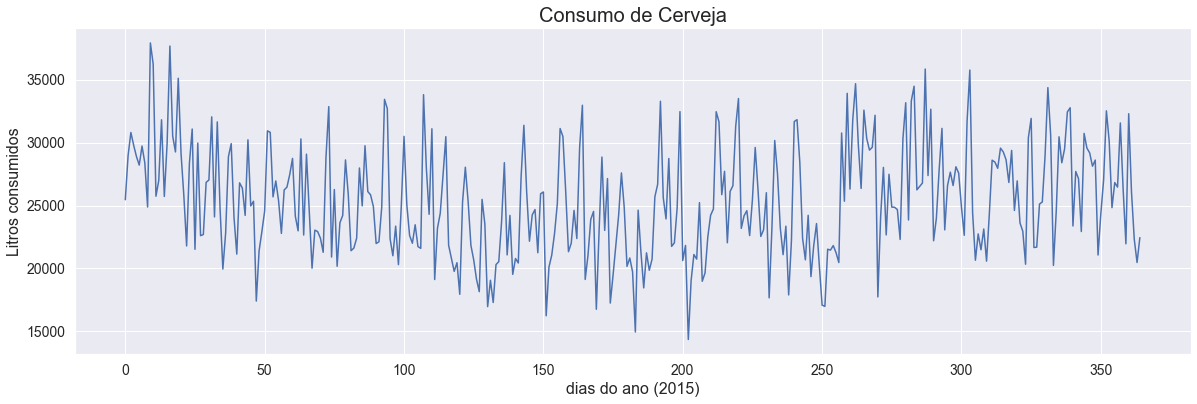

In [8]:
fig,ax = plt.subplots(figsize=(20,6))

ax = dados['consumo'].plot(fontsize=14)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros consumidos', fontsize=16)
ax.set_xlabel('dias do ano (2015)', fontsize=16)

ax.grid(True,axis='y')

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

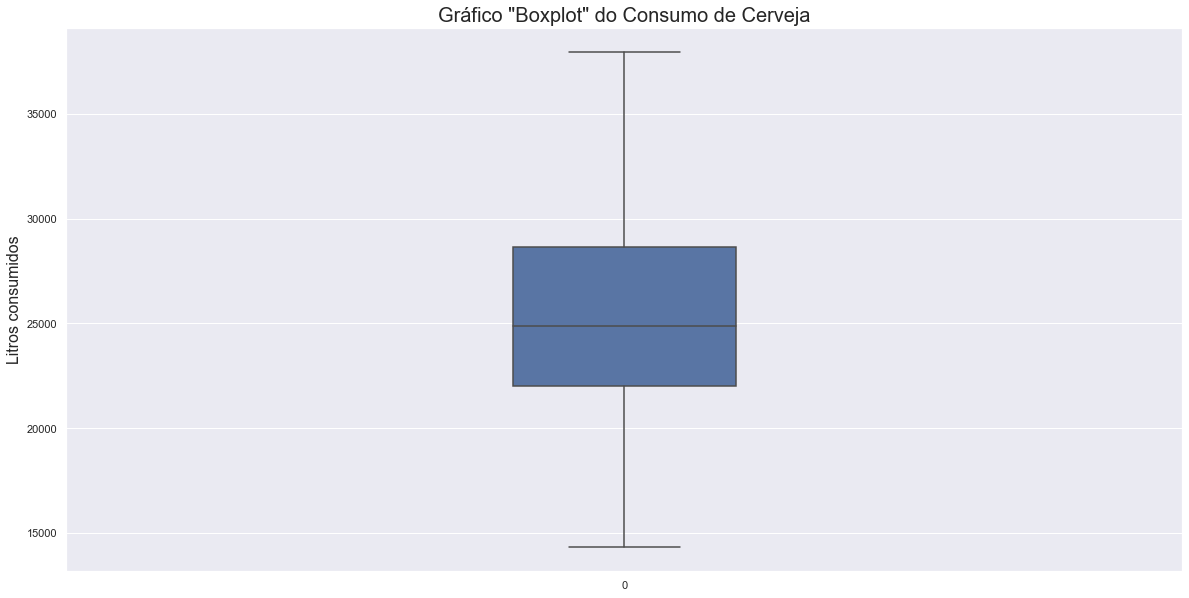

In [9]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=dados['consumo'],width=0.2)
ax.set_title('Gráfico "Boxplot" do Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros consumidos', fontsize=16)
plt.show()

Analisando o gráfico acima, é possível tirar algumas conclusões iniciais acerca da variável 
- Não há muita assimetria nos dados, com uma pequena tendência para a direita (acima);
- Não há presença de outliers claros, o que evidencia a consistência dos dados;
- Os dados possuem uma grande amplitude, mas possuem um intervalo interquartil coerente.

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

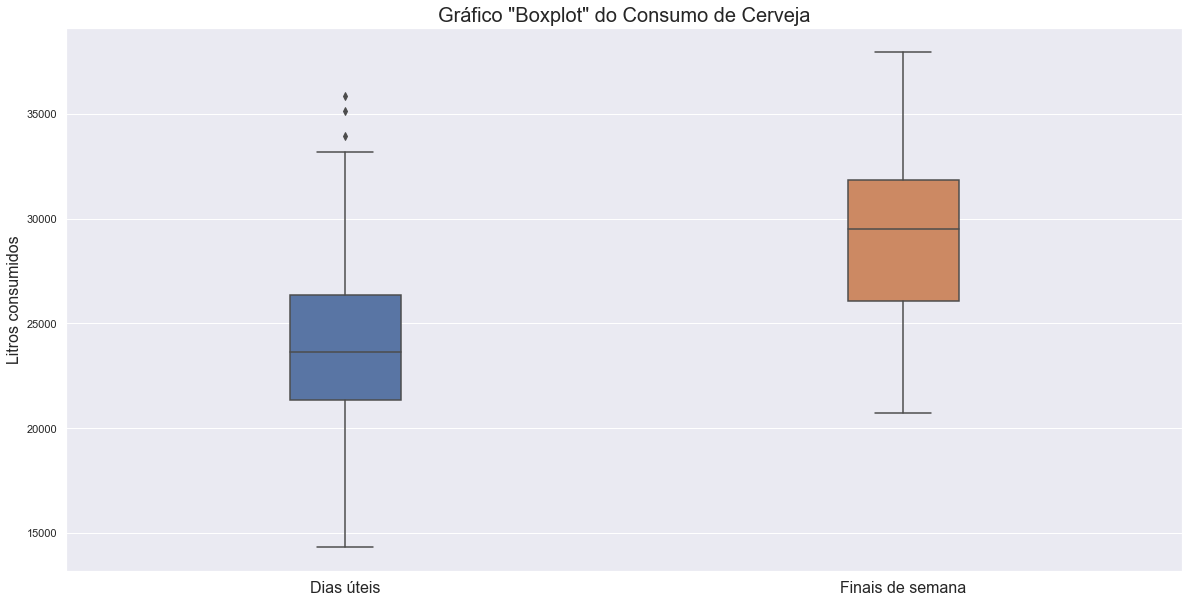

In [10]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='fds',y='consumo' ,data=dados,width=0.2)
ax.set_title('Gráfico "Boxplot" do Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros consumidos', fontsize=16)
ax.set_xlabel(None)
ax.set_xticklabels(['Dias úteis','Finais de semana'],fontsize=16)
plt.show()

Ao separar a análise do consumo de cerveja em **Dias úteis** e ** Finais de semana**, podemos perceber uma clara distinção entre os dois perfis de consumo.
É possivel notar ainda no boxplot que há alguns registros nos dias úteis acima do esperado, configurando **outliers**. Vamos investigar a fundo para descrobrir quem são estes valores.

In [11]:
#selecionando apenas os dados de dias úteis
selecao = dados['fds'] == 0
dados_dias_uteis = dados[selecao]

#calculando os parâmetros do boxplot
Q1 = dados_dias_uteis['consumo'].quantile(.25)
Q3 = dados_dias_uteis['consumo'].quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1-1.5*IIQ
limite_superior = Q3+1.5*IIQ

#Identificando os Outliers
selecao = (dados_dias_uteis['consumo']<= limite_inferior) | (dados_dias_uteis['consumo']>=limite_superior)
dados_dias_uteis[selecao]


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
19,20/01/2015,27.68,23.3,35.6,0.6,0,35127
259,17/09/2015,27.26,20.4,33.0,0.0,0,33930
287,15/10/2015,28.12,18.9,35.8,0.0,0,35861


É possivel notar que os outliers dos dias úteis ocorreram em dias com alta temperatura registrada, o que pode ser o principal fator influenciando o alto consumo. Paralelamente, outros dados secundários podem ser observados.

O primeiro registro ocorreu em Janeiro, o que pode ter relação com o período de férias escolares. No dia 15 de outubro é comemorado o dia do professor, o que também pode ter relação com o alto registro em função de possíveis confraternizações na data.


## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [12]:
sns.set_palette('Reds_r')

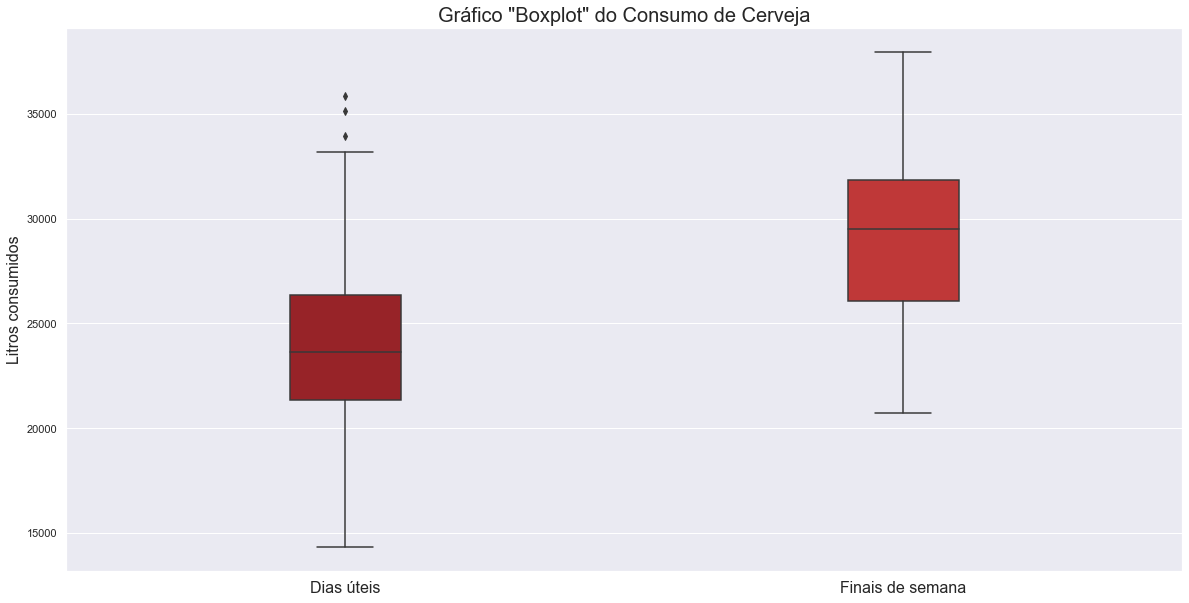

In [13]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='fds',y='consumo' ,data=dados,width=0.2)
ax.set_title('Gráfico "Boxplot" do Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros consumidos', fontsize=16)
ax.set_xlabel(None)
ax.set_xticklabels(['Dias úteis','Finais de semana'],fontsize=16)
plt.show()

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

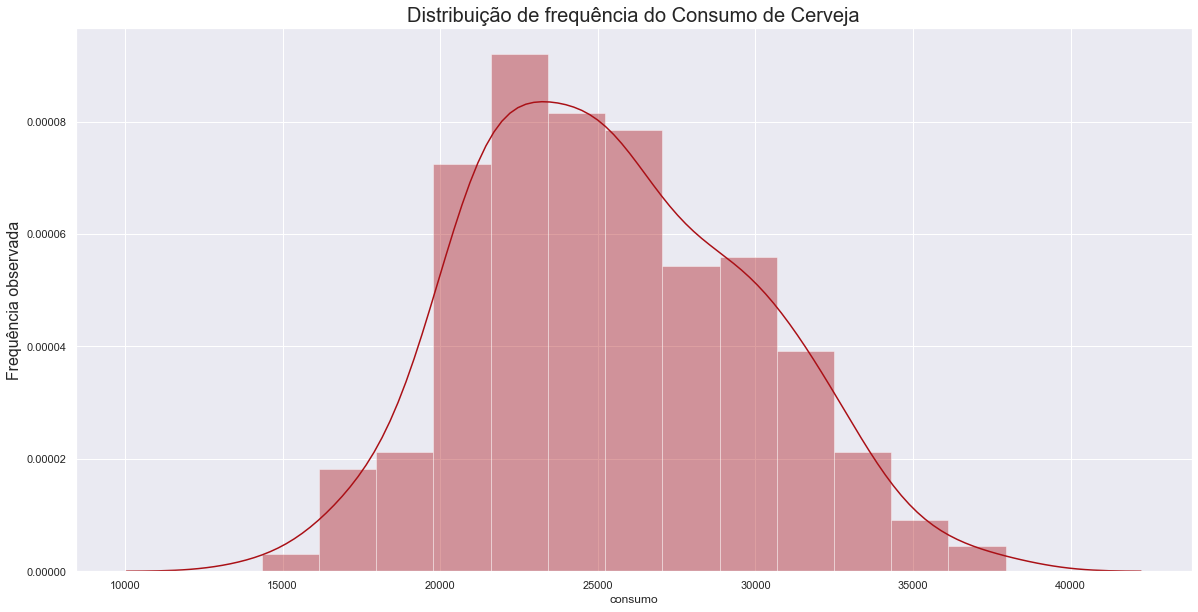

In [14]:
plt.figure(figsize=(20,10))
ax = sns.distplot(dados['consumo'])
ax.set_title('Distribuição de frequência do Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Frequência observada', fontsize=16)

plt.show()

A forma da distribuição dos dados, *de forma informal (visual)*, demonstra estar próxima da distribuição normal. Existem alguns pequenos desvios na forma, o que é esperado devido as características dos dados e ao número relativamente pequeno de amostras.

Como lembramos das disciplinas estatísticas do Mestrado, existem testes formais para verificar se estes dados realmente podem ser assumidos como uma distribuição normal. O Rodrigo prometeu passar por isso em outro momento.

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

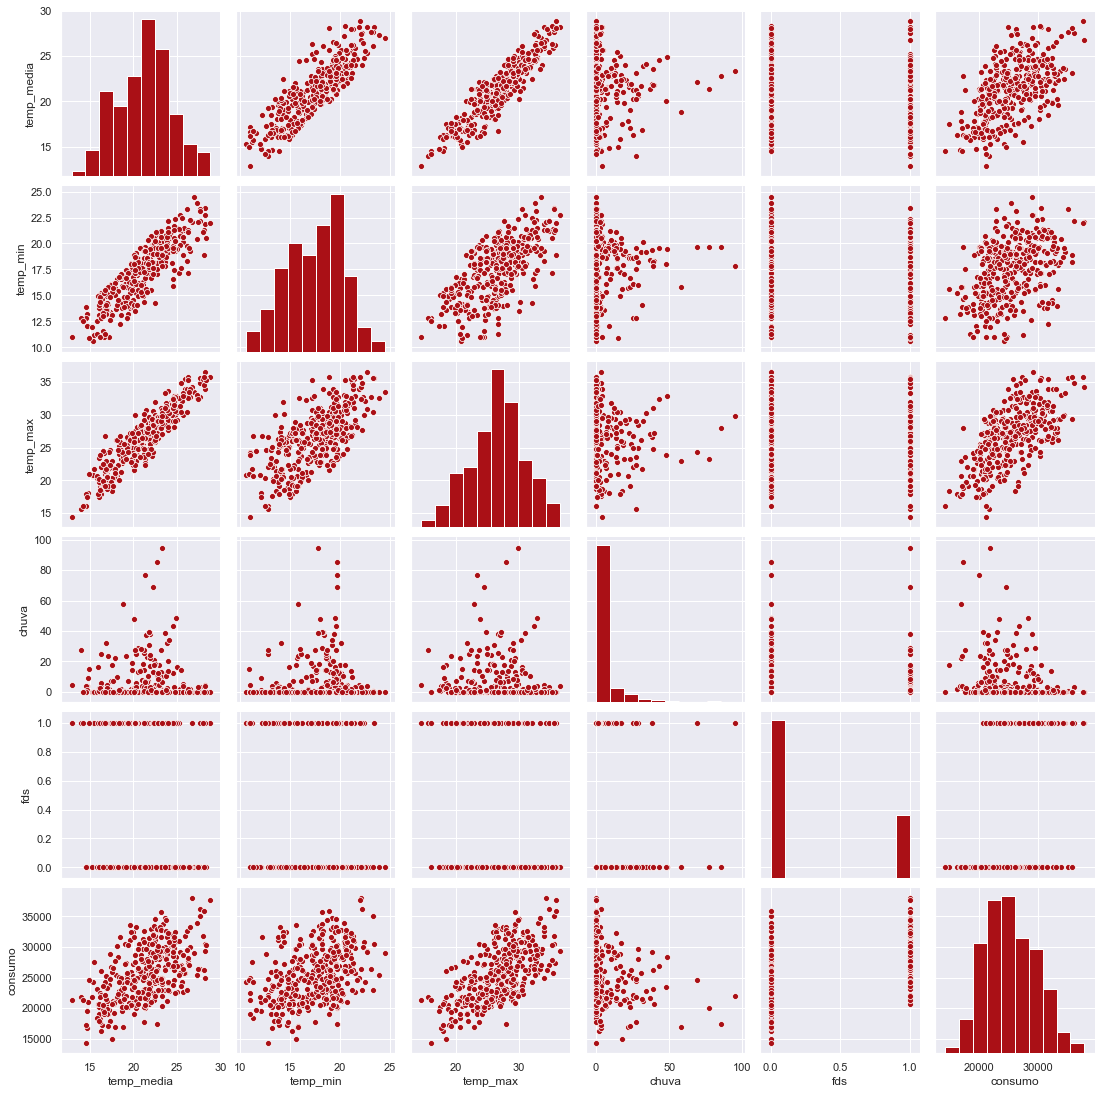

In [15]:
sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

Text(0.5, 1.15, 'Gráficos de Dispersão entre as Variáveis')

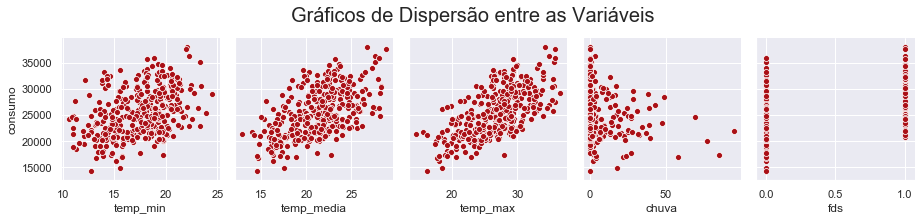

In [16]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Gráficos de Dispersão entre as Variáveis', fontsize=20, y=1.15)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

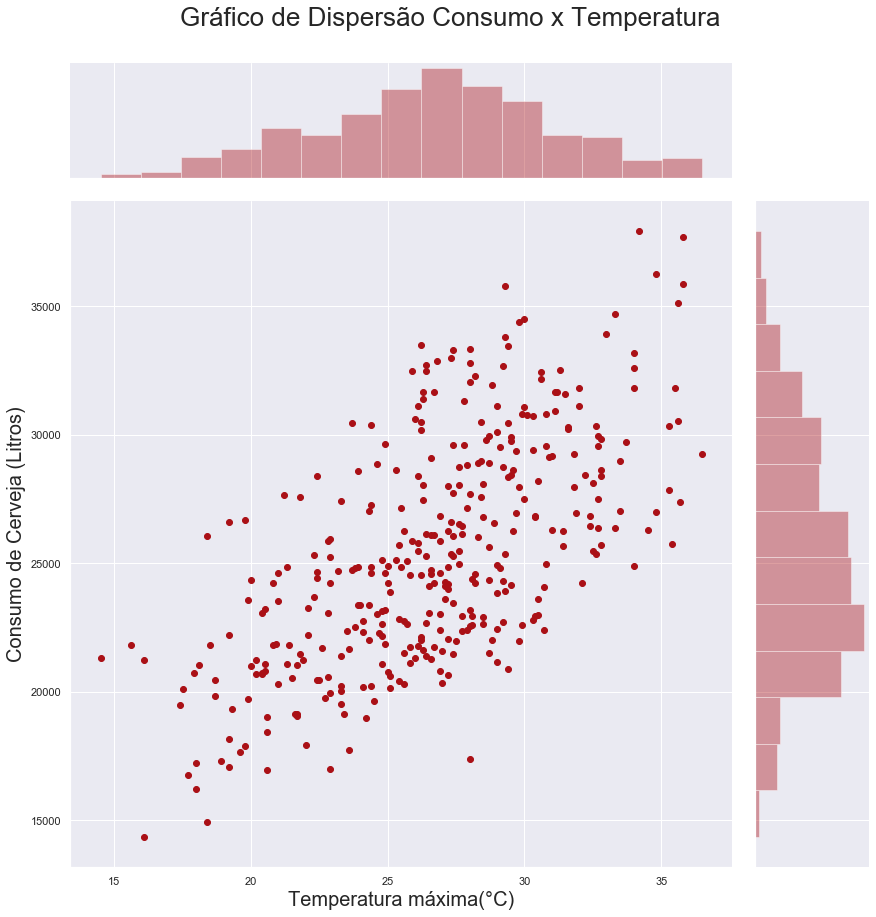

In [17]:
ax = sns.jointplot(x="temp_max",y="consumo",data=dados,height=12)
ax.fig.suptitle('Gráfico de Dispersão Consumo x Temperatura', fontsize=26, y=1.05)
ax.set_axis_labels('Temperatura máxima(°C)', 'Consumo de Cerveja (Litros)', fontsize=20)

plt.show()


## Plotando um jointplot com a reta de regressão estimada

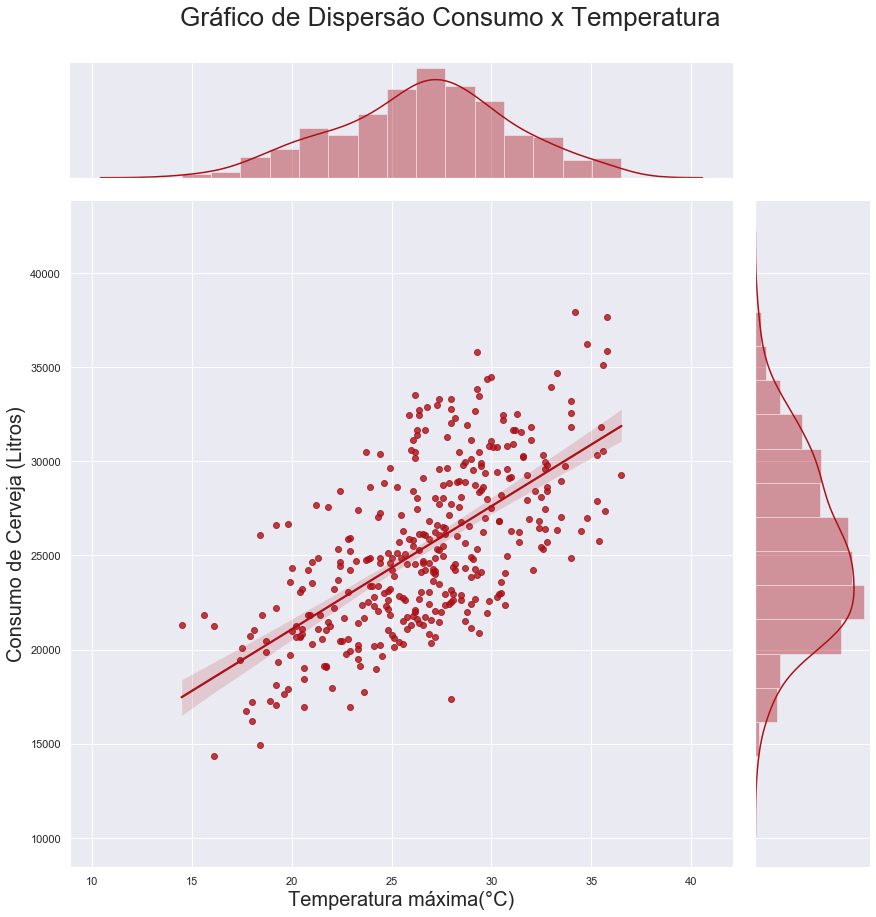

In [18]:
ax = sns.jointplot(x="temp_max",y="consumo",data=dados,height=12, kind='reg')
ax.fig.suptitle('Gráfico de Dispersão Consumo x Temperatura', fontsize=26, y=1.05)
ax.set_axis_labels('Temperatura máxima(°C)', 'Consumo de Cerveja (Litros)', fontsize=20)

plt.show()

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

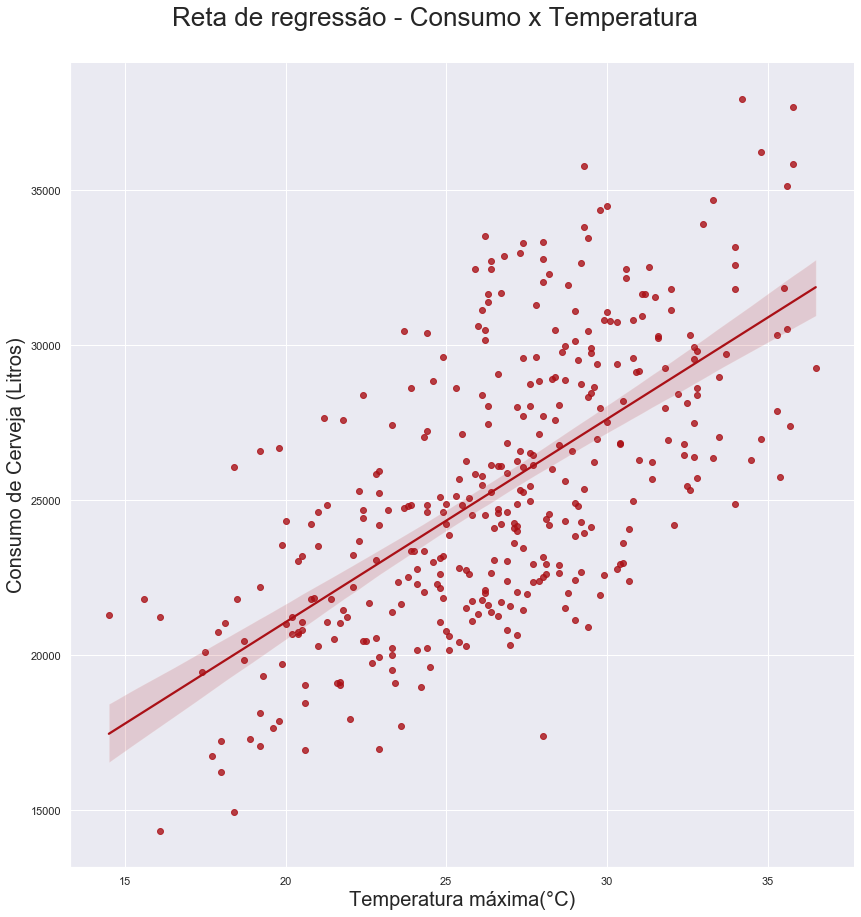

In [19]:
ax = sns.lmplot(x="temp_max",y="consumo",data=dados,height=12)
ax.fig.suptitle('Reta de regressão - Consumo x Temperatura', fontsize=26, y=1.05)
ax.set_xlabels('Temperatura máxima(°C)', fontsize=20)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=20)

plt.show()

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

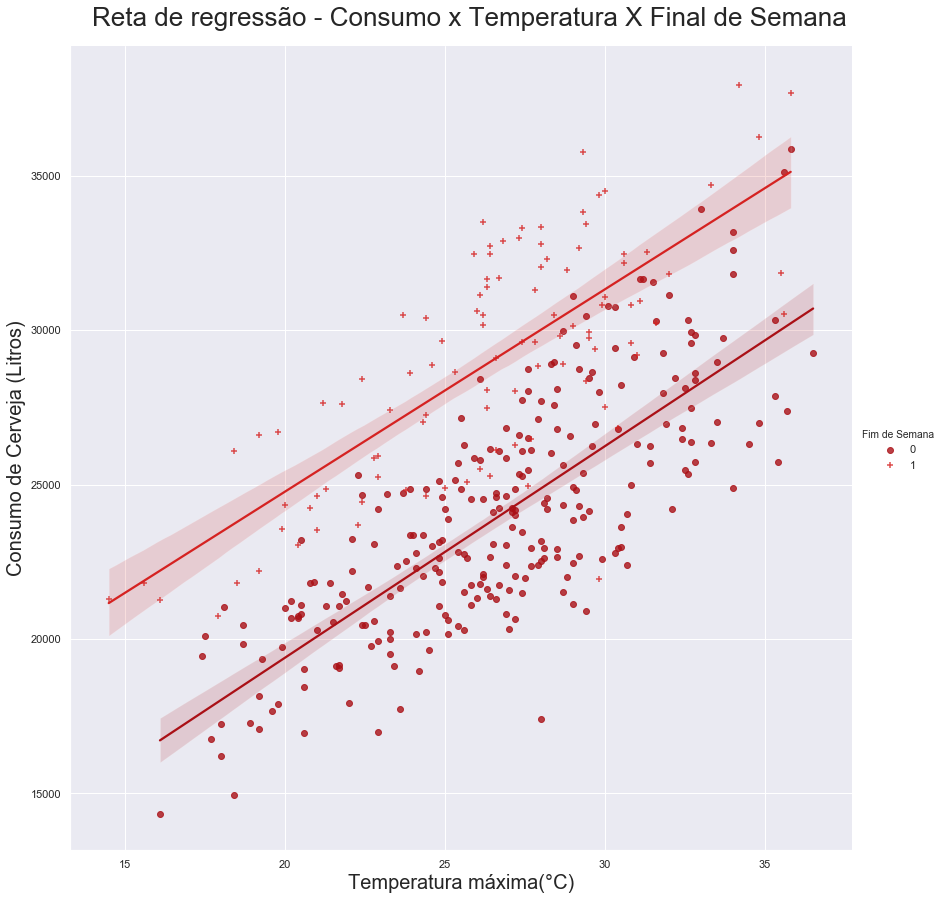

In [20]:
ax = sns.lmplot(x="temp_max",
                y="consumo",
                data=dados,
                height=12,
                hue="fds",
                legend=False,
                markers=['o','+'])
ax.fig.suptitle('Reta de regressão - Consumo x Temperatura X Final de Semana', fontsize=26, y=1.03)
ax.set_xlabels('Temperatura máxima(°C)', fontsize=20)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=20)
ax.add_legend(title='Fim de Semana')

plt.show()

Este tipo de gráfico pode ficar confuso quando usamos uma paleta de cores muito próxima (conforme acima). neste caso, pode ser mais interessante distinguir os pontos por ```col=```. Veja o próximo exemplo.

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

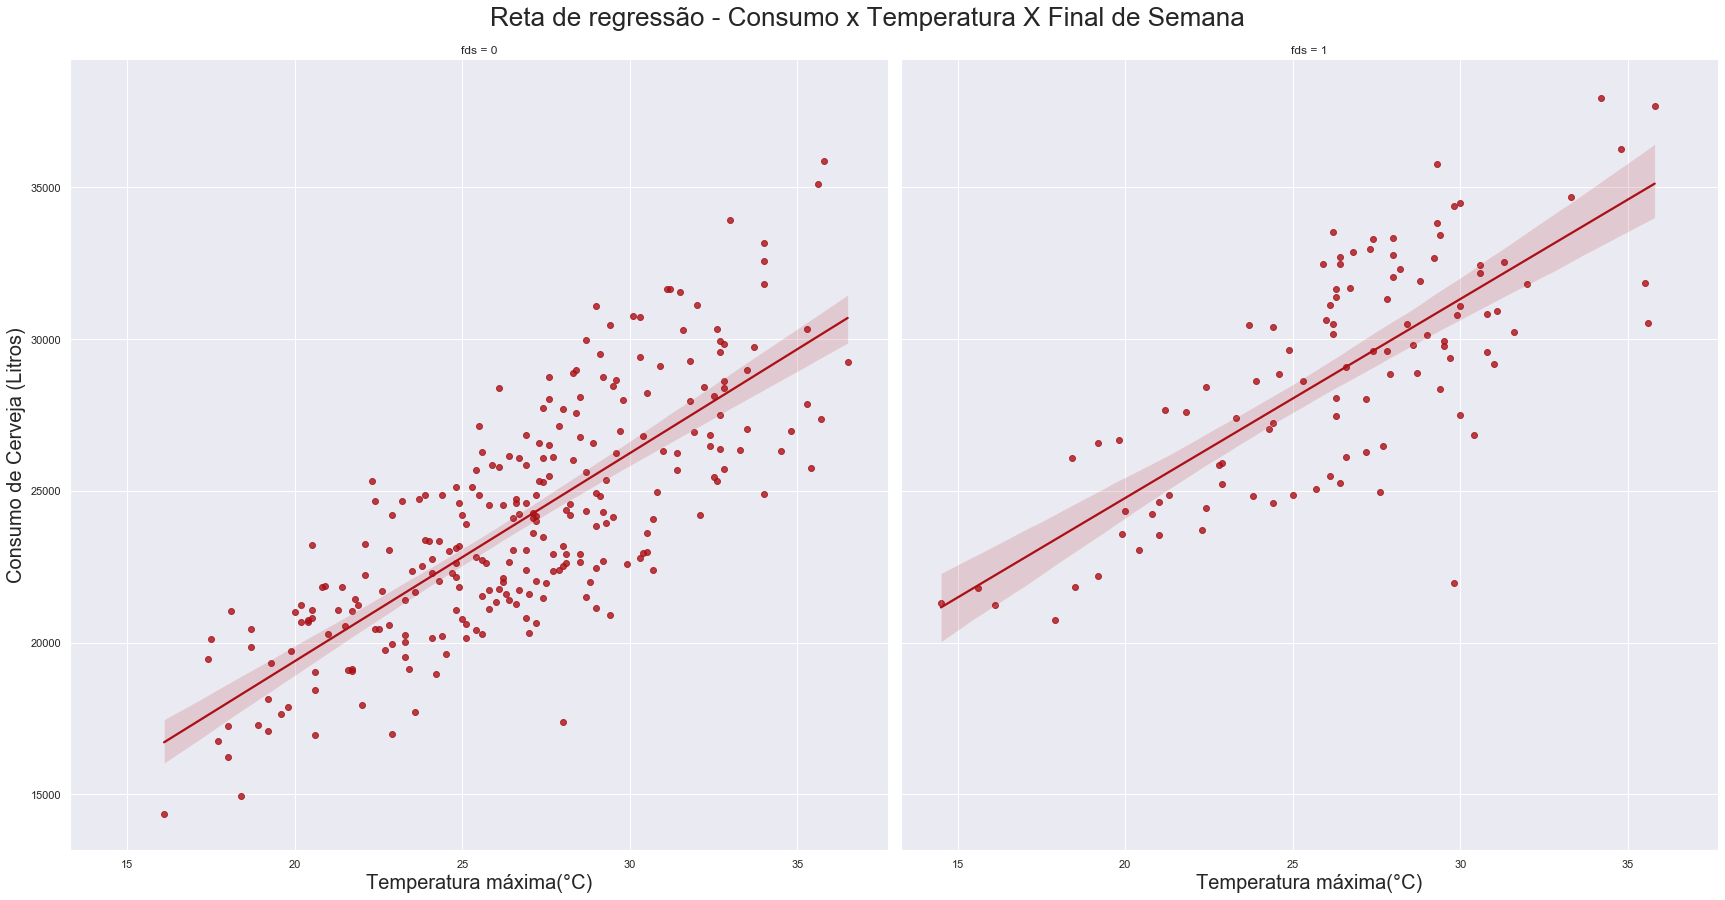

In [21]:
ax = sns.lmplot(x="temp_max",
                y="consumo",
                data=dados,
                height=12,
                col="fds",
                legend=False,
                )
ax.fig.suptitle('Reta de regressão - Consumo x Temperatura X Final de Semana', fontsize=26, y=1.03)
ax.set_xlabels('Temperatura máxima(°C)', fontsize=20)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=20)


plt.show()

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O scikit-learn é um módulo Python especializado em soluções para machine learning.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [23]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [24]:
X = dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

Com a função ```train_test_split``` geramos a divisão dos DataFrames em o que será utilizado para teste e o que será utilizado para treino (formação do modelo de regressão). O parâmetro ```test_size``` permite especificar qual o percentual dos DataFrames originais deverá ser separado para teste (deixando o restante para treino). No exemplo abaixo, estamos utilizando 30% dos dados para teste.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [26]:
X_train.shape

(255, 3)

In [27]:
X_test.shape

(110, 3)

In [28]:
X_test.shape[0]+X_train.shape[0] == X.shape[0]

True

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [30]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [31]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [32]:
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [33]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [34]:
print('R² = %s' % metrics.r2_score(y_test,y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [35]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [36]:
modelo.predict(entrada)[0].round(2)

26094.9

## Criando um simulador simples

In [51]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [37]:
modelo.intercept_

5951.976339312445

In [38]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [39]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [40]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [45]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [51]:
index = ['Intercepto (L)','Temperatura Máxima (°C)','Chuva (mm)','Final de Semana (S/N)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [52]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parâmetros'])

,Parâmetros
Intercepto (L),5951.976339
Temperatura Máxima (°C),684.736759
Chuva (mm),-60.782435
Final de Semana (S/N),5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> $\rightarrow$ Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> $\rightarrow$  Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> $\rightarrow$  Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> $\rightarrow$  Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [53]:
y_previsto_treino = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

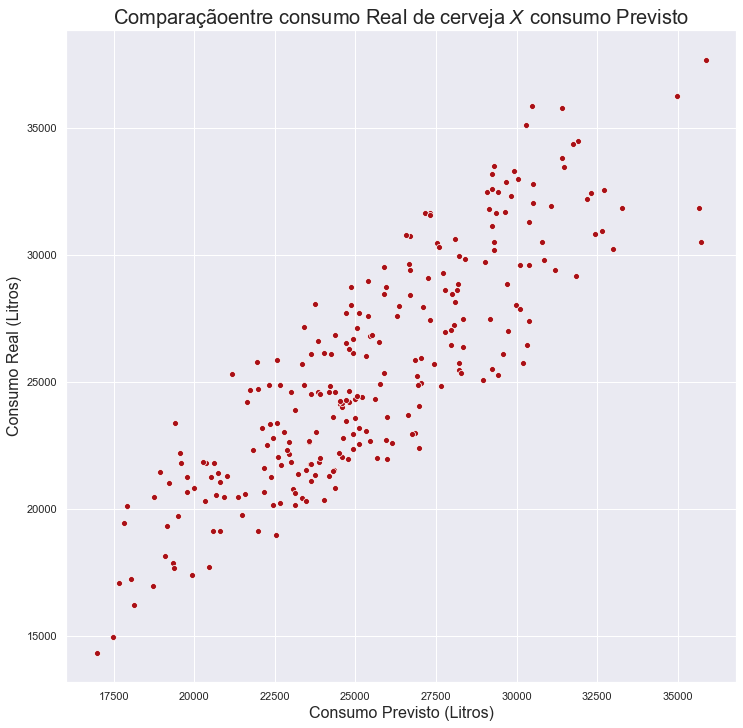

In [64]:
ax = sns.scatterplot(x=y_previsto_treino, y=y_train)
ax.figure.set_size_inches(12,12)
ax.set_title('Comparação entre consumo Real de cerveja $X$ consumo Previsto', fontsize=20)
ax.set_xlabel('Consumo Previsto (Litros)',fontsize=16)
ax.set_ylabel('Consumo Real (Litros)', fontsize=16)

plt.show()

## Obtendo os resíduos

In [65]:
residuo = y_train - y_previsto_treino

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade). Se os resíduos não apresentarem dependência entre si, e se eles estiverem limitados, podemos afirmar que que o modelo possui uma boa homocedasticidade.

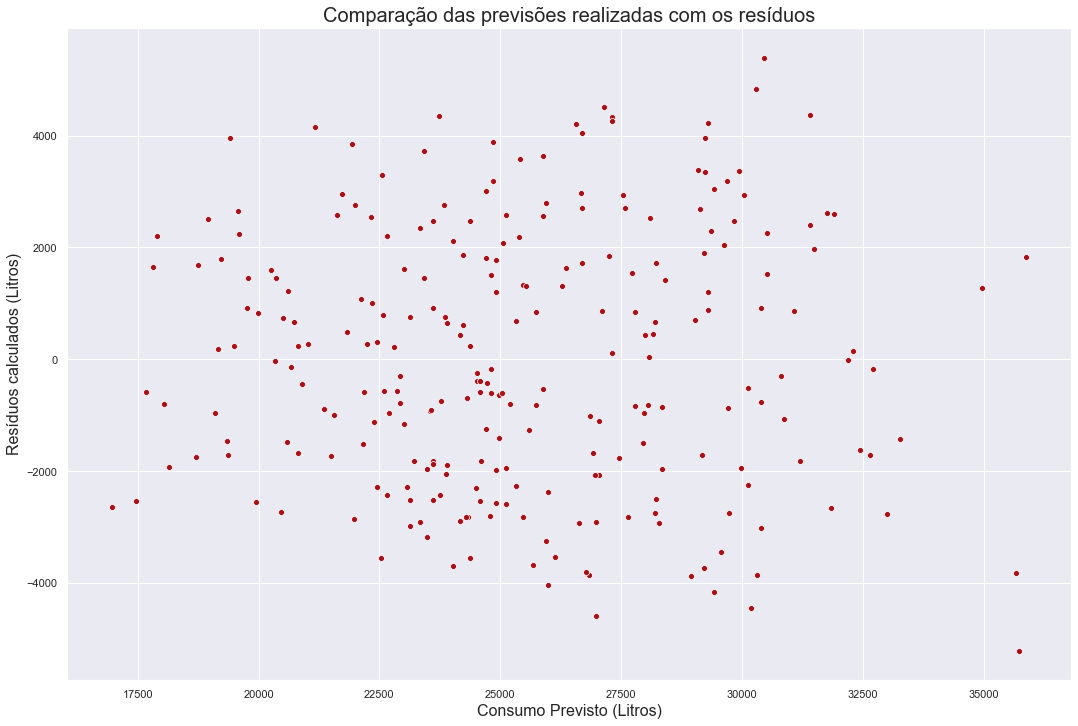

In [67]:
ax = sns.scatterplot(x=y_previsto_treino, y=residuo)
ax.figure.set_size_inches(18,12)
ax.set_title('Comparação das previsões realizadas com os resíduos', fontsize=20)
ax.set_xlabel('Consumo Previsto (Litros)',fontsize=16)
ax.set_ylabel('Resíduos calculados (Litros)', fontsize=16)

plt.show()

## Utilizando os resíduos ao quadrado

A imagem abaixo mostra formas visuais de identificar quando não temos os dados se comportando da forma desejada (quando há heterocedasticidade nos resíduos).


<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

Lembramos lá da estatística que é bom analisar resíduos de forma qudrática pra eliminar o efeito o sinal. Vmos fazer isso.

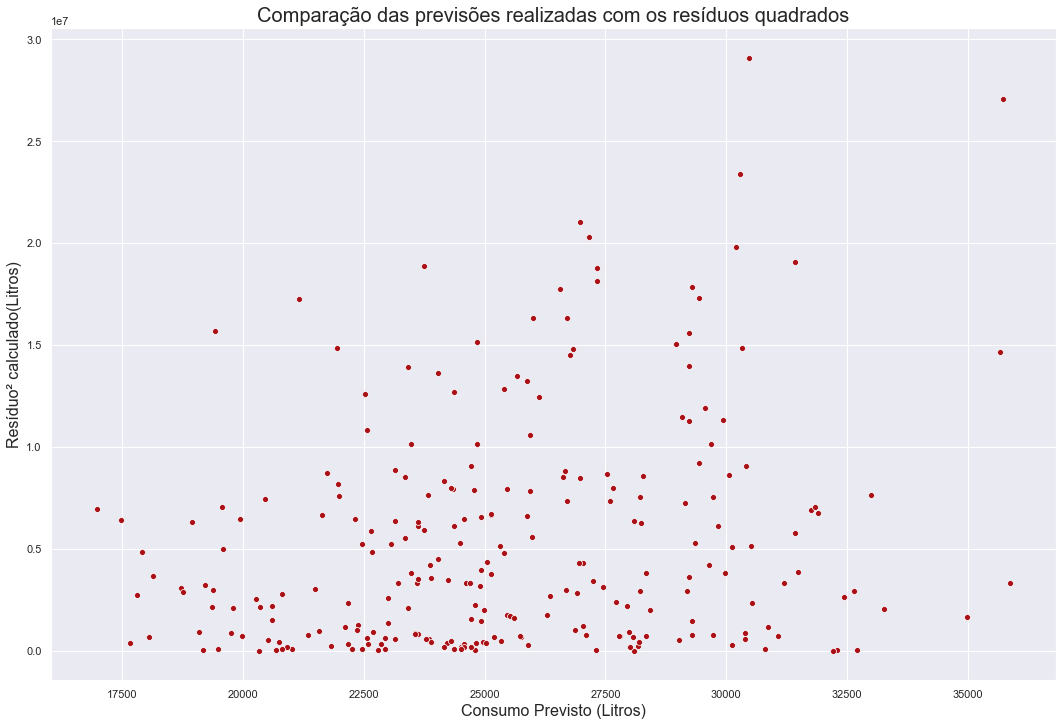

In [68]:
ax = sns.scatterplot(x=y_previsto_treino, y=residuo**2)
ax.figure.set_size_inches(18,12)
ax.set_title('Comparação das previsões realizadas com os resíduos quadrados', fontsize=20)
ax.set_xlabel('Consumo Previsto (Litros)',fontsize=16)
ax.set_ylabel('Resíduo² calculado(Litros)', fontsize=16)

plt.show()

Observando este último gráfico, fica mais claro que os resíduos não parecem estar totalmente limitados em torno de uma média. Eles têm uma característica semelhante à do segundo exemplo apresentado na figura anterior. Isso indica que há provavelmente os dados não devem passar num teste de homocedasticidade.

## Plotando a distribuição de frequências dos resíduos

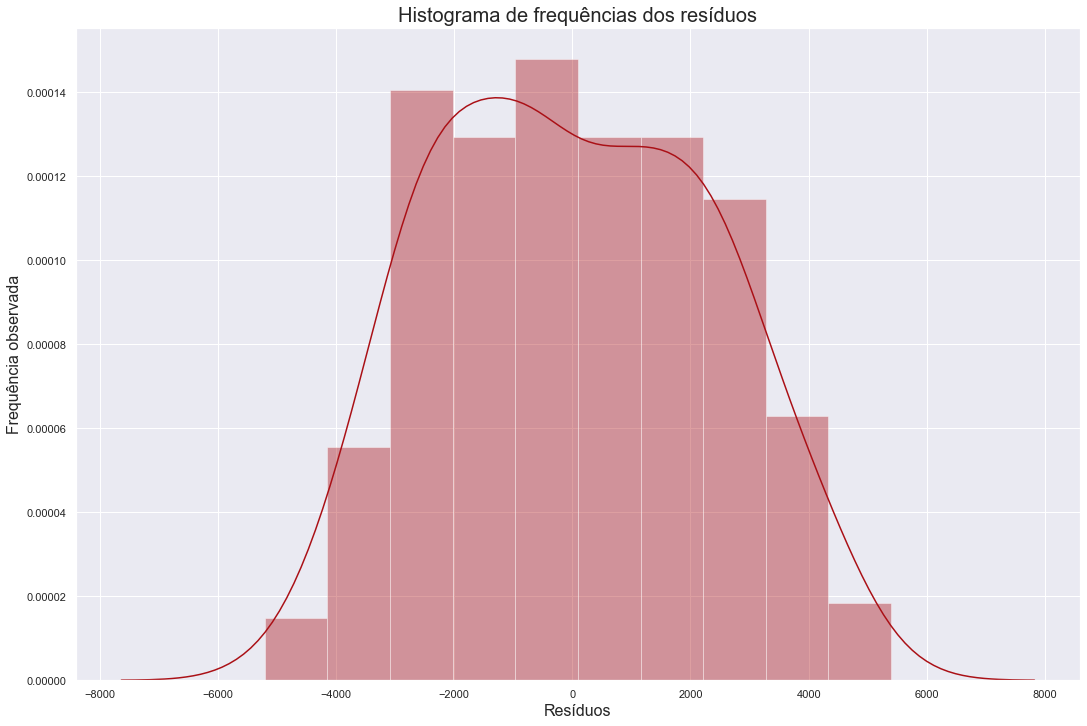

In [71]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(18,12)
ax.set_title('Histograma de frequências dos resíduos', fontsize=20)
ax.set_xlabel('Resíduos',fontsize=16)
ax.set_ylabel('Frequência observada', fontsize=16)

plt.show()

O histograma acima possui uma boa semelhança com a forma da distribuição normal, o que é um bom sinal. Como temos tanto evidências positivas quanto negativas ao bom ajuste do modelo obtido, justifica-se a aplicação de testes formais para verificar se o modelo está adequado.

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [73]:
X2 = dados[['temp_media','chuva','fds']]

## Criando os datasets de treino e de teste

In [74]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [78]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [79]:
modelo_2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [81]:
print('Modelo com a Temperatura Média:')
print('R² = {}'.format(modelo_2.score(X2_train,y2_train).round(2)))

Modelo com a Temperatura Média:
R² = 0.66


In [82]:
print('Modelo com a Temperatura Máxima:')
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

Modelo com a Temperatura Máxima:
R² = 0.73


Como esperado, o modelo com a temperatura máxima obteve um desempenho melhor segundo o *R² Score*. Isso era esperado, pois notamos que a temperatura máxima possuia uma correlação maior com a variável dependente na análise de correlação (em comparação com a temperatura média).

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [83]:
y2_previsto = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [84]:
print('Modelo com a Temperatura Média:')
print('R² = %s' % metrics.r2_score(y2_test,y2_previsto).round(2))

Modelo com a Temperatura Média:
R² = 0.66


In [85]:
print('Modelo com a Temperatura Máxima:')
print('R² = %s' % metrics.r2_score(y_test,y_previsto).round(2))

Modelo com a Temperatura Máxima:
R² = 0.69


Nos dados de teste é possível perceber que a diferença entre os modelos calculada no teste R² é menor, mas o modelo com a temperatura máxima continua melhor.

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [87]:
MSE_2 = metrics.mean_squared_error(y2_test,y2_previsto).round(2)
SMSE_2 = np.sqrt(MSE_2).round(2)
R2_2 = metrics.r2_score(y2_test,y2_previsto).round(2)
pd.DataFrame([MSE_2,SMSE_2,R2_2], ['MSE', 'SMSE', 'R²' ], columns=['Métricas'])

Métricas para o modelo com Temperatura Média


,Métricas
MSE,6060775.46
SMSE,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [90]:
MSE = metrics.mean_squared_error(y_test,y_previsto).round(2)
SMSE = np.sqrt(MSE).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)
pd.DataFrame([MSE,SMSE,R2], ['MSE', 'SMSE', 'R²' ], columns=['Métricas'])

,Métricas
MSE,5471976.38
SMSE,2339.23
R²,0.69


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [91]:
import pickle

output = open('modelo_consumo_cerveja','wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```